# Sample run for Fisher Market

In [48]:
using Pkg
Pkg.activate("../")

  Activating project at `~/workspace/ExchangeMarket.jl/scripts`


In [49]:
using Revise
using Random, SparseArrays, LinearAlgebra
using JuMP, MosekTools
using Plots, LaTeXStrings, Printf
import MathOptInterface as MOI
using Plots, LaTeXStrings, Printf, JLD2
using ExchangeMarket

include("../tools.jl")
include("../plots.jl")
include("./setup.jl")
switch_to_pdf(; bool_use_html=true)


@load "../ml-32m.jld2" S
bool_part = true
if bool_part
    m = 2000
    n = 5000
    T = S[1:n, 1:m]
else
end
S, cols, rows = ExchangeMarket.drop_empty(T)
n, m = size(S)
# S = Matrix(S)
S = S .* 2.0
ϵₚ = 1e-6


1.0e-6

## Test different $\rho$ in a CES Economy

Run CES economy by different methods

In [50]:
method_filter(name) = name ∈ [:LogBar, :PathFol, :Tât, :PropRes]

method_filter (generic function with 1 method)

In [51]:
table_time = []
results = []
results_phi = Dict()
results_ground = Dict()
# for ρ in rrange
# ρ = -0.92
ρ = -9.0

f0 = FisherMarket(m, n; c=S, ρ=ρ, bool_unit=true, bool_unit_wealth=true, scale=0.1, bool_ensure_nz=true)
# f0 = FisherMarket(m, n; ρ=ρ, bool_unit=true, scale=30.0, sparsity=0.2)

linconstr = LinearConstr(1, n, ones(1, n), [sum(f0.w)])
ρfmt = @sprintf("%+.2f", ρ)
σfmt = @sprintf("%+.2f", f0.σ)
# -----------------------------------------------------------------------
# compute ground truth
# -----------------------------------------------------------------------
f1 = copy(f0)
p₀ = ones(n) * sum(f1.w) ./ (n)
x₀ = ones(n, m) ./ m
f1.x .= x₀
f1.p .= p₀
# use log-barrier method to compute ground truth
(name, method, kwargs) = method_kwargs[1]
kwargs = Dict(
    :tol => 1e-12, :maxiter => 20,
    :optimizer => CESAnalytic,
    # :option_mu => :pred_corr,
    :option_mu => :normal,
    #
    :option_step => :affinesc,
    # :option_step => :homotopy,
    # :option_step => :logbar,
    # :linsys => :DRq,
    :linsys => :krylov,
    # :linsys => :direct,
)
alg = method(
    n, m, p₀;
    linconstr=linconstr,
    kwargs...
)
traj = opt!(
    alg, f1;
    loginterval=1,
    maxiter=10,
    keep_traj=true,
    bool_init_phase=false,
)
pₛ = copy(alg.p)
results_phi[ρ] = pₛ
results_ground[ρ] = (alg, traj, f1);


FisherMarket initialization started...
FisherMarket cost matrix initialized in 0.01731705665588379 seconds
FisherMarket initialized in 0.017509937286376953 seconds
FisherMarket initialization started...
FisherMarket cost matrix initialized in 0.016386032104492188 seconds
FisherMarket initialized in 0.016538143157958984 seconds
--------------------------------------------------------------------------------------------
                   ExchangeMarket.jl: A Julia Package for Exchange Market                   
                                    © Chuwen Zhang (2024)                                    
--------------------------------------------------------------------------------------------
 subproblem solver alias       := CESAnalytic
 subproblem solver style       := analytic
 lin-system solver alias       := krylov
 option for gradient           := dual
 option for step               := affinesc
 option for μ                  := normal
---------------------------------------------

┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 19; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      0 |  -7.40 | -2.993816e+00 | 1.5e+02 | 2.0e+00 | 3.5e-01 | 1.8e-01 | 3.7e-04 | 4.0e-01 


┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 24; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      1 |  -7.40 | -3.012791e+00 | 1.5e+02 | 1.3e+00 | 8.1e-01 | 4.4e-01 | 9.5e-04 | 4.0e-01 


┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 44; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      2 |  -7.40 | -3.052985e+00 | 1.5e+02 | 8.3e-01 | 1.3e+00 | 6.6e-01 | 2.1e-03 | 4.0e-01 


┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 76; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      3 |  -7.40 | -3.120652e+00 | 1.5e+02 | 5.0e-01 | 2.0e+00 | 9.0e-01 | 3.9e-03 | 4.0e-01 


┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 82; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      4 |  -7.40 | -3.205842e+00 | 1.5e+02 | 2.9e-01 | 2.7e+00 | 1.1e+00 | 6.8e-03 | 4.0e-01 


┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 92; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      5 |  -7.40 | -3.299021e+00 | 1.5e+02 | 1.7e-01 | 3.5e+00 | 1.4e+00 | 1.1e-02 | 4.0e-01 


┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 103; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      6 |  -7.41 | -3.390319e+00 | 1.5e+02 | 1.0e-01 | 4.4e+00 | 1.6e+00 | 1.7e-02 | 4.0e-01 


┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 111; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      7 |  -7.42 | -3.473240e+00 | 1.5e+02 | 6.4e-02 | 5.2e+00 | 1.8e+00 | 2.6e-02 | 4.0e-01 


┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 123; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      8 |  -7.43 | -3.548556e+00 | 1.4e+02 | 4.1e-02 | 6.2e+00 | 2.1e+00 | 3.8e-02 | 4.0e-01 


┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 128; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      9 |  -7.44 | -3.621298e+00 | 1.4e+02 | 2.7e-02 | 7.1e+00 | 2.4e+00 | 5.5e-02 | 4.0e-01 
--------------------------------------------------------------------------------------------
 ✓  final play
 ✓  finished in          10 steps
             in 7.14430e+00 seconds
  best-resp. in 2.35277e+00 seconds 
            avg 2.35277e-01 seconds 
          usage 32.93%
--------------------------------------------------------------------------------------------


In [52]:
using LinearAlgebra, LinearOperators, Krylov

In [53]:
alg.Hk.niter

802

In [54]:
f1.σ

-0.9

In [55]:
@time ExchangeMarket.__compute_exact_hess_optimized!(alg, f1)
H = diagm(alg.p) * alg.H * diagm(alg.p)

# fisher = f1
# b = alg.p .* fisher.x
# pxbar = sum(b; dims=2)[:]
# γ = 1 ./ fisher.w' .* b
# u = fisher.w .* fisher.σ
# H₁ = diagm(pxbar .* (fisher.σ + 1)) - γ * diagm(u) * γ'
# H₁ - H

  0.205443 seconds (2.08 k allocations: 267.220 MiB, 1.23% gc time)


┌ Info: exact dense Hessian built (σ = -0.9)
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/diff.jl:225


5000×5000 Matrix{Float64}:
 0.000236428  1.86107e-5   6.62066e-7   …  0.0          0.0
 1.86107e-5   0.000167979  6.06543e-7      2.80615e-11  0.0
 6.62066e-7   6.06543e-7   3.97675e-5      6.46035e-11  1.27459e-11
 1.48485e-10  5.62268e-11  2.82678e-11     0.0          0.0
 1.70739e-5   2.03148e-5   2.48731e-6      5.81737e-11  1.79952e-11
 9.57687e-6   4.36299e-6   3.1113e-7    …  3.38625e-11  0.0
 1.80604e-5   1.59457e-5   7.96071e-7      0.0          0.0
 8.91429e-11  5.69364e-11  2.89843e-11     0.0          0.0
 9.88176e-6   6.08124e-6   9.37857e-7      1.07232e-10  1.45886e-10
 2.87548e-6   3.30683e-6   8.66771e-7      1.47027e-10  1.81175e-11
 ⋮                                      ⋱               
 2.90764e-12  1.42358e-11  2.17639e-11     2.96185e-14  3.05128e-14
 1.68796e-10  1.10827e-10  6.80115e-10     4.95456e-13  1.50733e-13
 6.85766e-12  0.0          2.48404e-11     3.57681e-14  3.6848e-14
 8.29483e-12  4.38017e-12  1.29458e-11     2.8133e-14   2.89824e-14
 7.31478e-11 

## Baseline

In [57]:
ExchangeMarket.__update_php_hessop!(alg, f1)
d, stats = cg(alg.Hk.php_hessop, alg.p .* alg.∇; verbose=3, timemax=10.0, history=true)

CG: system of 5000 equations in 5000 variables
    k      ‖r‖       pAp         α         σ  timer
    0  3.8e-02   3.0e-06   4.7e+02   4.7e+02  0.00s
    3  5.0e-03   7.6e-09   3.3e+03   3.3e+03  0.01s
    6  2.8e-03   2.1e-09   3.6e+03   3.6e+03  0.02s
    9  2.3e-03   1.9e-09   2.9e+03   2.9e+03  0.03s
   12  1.6e-03   5.8e-10   4.2e+03   4.2e+03  0.04s
   15  1.1e-03   2.5e-10   4.9e+03   4.9e+03  0.04s
   18  1.5e-03   2.7e-09   8.4e+02   8.4e+02  0.05s
   21  8.5e-04   1.8e-10   4.0e+03   4.0e+03  0.06s
   24  6.5e-04   7.9e-11   5.4e+03   5.4e+03  0.07s
   27  5.7e-04   5.0e-11   6.6e+03   6.6e+03  0.07s
   30  5.0e-04   4.3e-11   5.9e+03   5.9e+03  0.08s
   33  4.6e-04   6.2e-11   3.4e+03   3.4e+03  0.09s
   36  4.0e-04   3.3e-11   4.9e+03   4.9e+03  0.10s
   39  3.9e-04   3.0e-11   5.1e+03   5.1e+03  0.10s
   42  3.9e-04   4.9e-11   3.0e+03   3.0e+03  0.11s
   45  3.0e-04   1.4e-11   6.1e+03   6.1e+03  0.12s
   48  2.4e-04   7.0e-12   8.4e+03   8.4e+03  0.13s
   51  2.5e-04   

([-1.9896854820353966, -1.0918766204774228, 0.7098629953018357, 6.013782095349445, -2.455415376646525, -1.4041833612643468, -1.6854226630566962, 5.607829061679228, -1.9119162163411687, -1.93273627707325  …  5.549376003417058, 5.539565834985492, 10.779995459634172, 5.892547890601378, 5.523421553680603, 5.426011382864188, 5.360415626089721, 5.148322444135221, 5.537555774358236, 5.531322610080242], SimpleStats
 niter: 742
 solved: true
 inconsistent: false
 indefinite: false
 residuals: [ 3.8e-02  5.7e-03  3.9e-03 ...  2.2e-08  1.7e-08  1.5e-08 ]
 Aresiduals: []
 κ₂(A): []
 timer: 1.94s
 status: solution good enough given atol and rtol
)

In [12]:
ExchangeMarket.__update_php_hessop!(alg, f1)
d, stats = cg(H, alg.p .* alg.∇; verbose=3, timemax=10.0)

CG: system of 5000 equations in 5000 variables
    k      ‖r‖       pAp         α         σ  timer
    0  3.9e-02   2.6e-05   5.8e+01   5.8e+01  0.11s
    3  2.8e-02   1.0e-05   7.5e+01   7.5e+01  0.21s
    6  1.9e-02   3.7e-06   9.4e+01   9.4e+01  0.22s
    9  1.6e-02   2.0e-06   1.2e+02   1.2e+02  0.23s
   12  1.8e-02   2.6e-06   1.2e+02   1.2e+02  0.23s
   15  1.9e-02   3.7e-06   9.9e+01   9.9e+01  0.24s
   18  1.7e-02   2.7e-06   1.0e+02   1.0e+02  0.25s
   21  1.3e-02   2.0e-06   8.2e+01   8.2e+01  0.26s
   24  8.7e-03   6.4e-07   1.2e+02   1.2e+02  0.27s
   27  8.2e-03   9.5e-07   7.0e+01   7.0e+01  0.27s
   30  5.1e-03   1.9e-07   1.4e+02   1.4e+02  0.28s
   33  4.5e-03   1.5e-07   1.4e+02   1.4e+02  0.29s
   36  4.0e-03   1.1e-07   1.5e+02   1.5e+02  0.30s
   39  3.7e-03   1.3e-07   1.1e+02   1.1e+02  0.30s
   42  2.8e-03   5.1e-08   1.6e+02   1.6e+02  0.31s
   45  2.2e-03   3.3e-08   1.5e+02   1.5e+02  0.32s
   48  2.0e-03   2.8e-08   1.4e+02   1.4e+02  0.33s
   51  1.5e-03   

([-0.3512719294895869, -0.37288408684596047, -0.16901463687578022, 0.5885835856340744, -0.33798878447414077, -0.3724784393471325, -0.3440135279102692, 2.600901893425461, -0.37755426003436904, -0.3038779796006651  …  2.9592824915230937, 2.115679879436926, 0.3574240034100999, 1.2626530321607172, 2.9145571320997448, 1.6038616300494621, 2.297134320710254, 3.098946650175404, 2.6738620930851886, 3.0237497551570662], SimpleStats
 niter: 3290
 solved: true
 inconsistent: false
 indefinite: false
 residuals: []
 Aresiduals: []
 κ₂(A): []
 timer: 9.43s
 status: solution good enough given atol and rtol
)

## Use DR1 as preconditioner?

- this is not so good

In [12]:
ExchangeMarket.__compute_approx_hess_drq!(alg, f1)
alg.Ha.d .+= alg.μ
smw_drq!(alg.Ha)
Mf = ExchangeMarket.__assemble_drq_approx(alg.Ha)
# Mop = LinearOperator(Float64, f1.n, f1.n, true, true, (buff, v) -> alg.Ha.Hi(v))
Mop = LinearOperator(Mf; symmetric=true)

Linear operator
  nrow: 5000
  ncol: 5000
  eltype: Float64
  symmetric: true
  hermitian: false
  nprod:   0
  ntprod:  0
  nctprod: 0



In [13]:
alg.p .* sum(f1.x; dims=2)[:]
γ = alg.p .* sum(f1.x; dims=2)[:]
d, stats = cg(alg.Hk.php_hessop, alg.p .* alg.∇ .- alg.μ; M=diagm(γ), ldiv=false, verbose=10)

CG: system of 5000 equations in 5000 variables
    k      ‖r‖       pAp         α         σ  timer
    0  2.8e-03   2.3e-09   3.4e+03   3.4e+03  0.01s
   10  9.3e-04   7.6e-11   1.1e+04   1.1e+04  0.06s
   20  5.3e-04   2.7e-11   1.0e+04   1.0e+04  0.11s
   30  3.2e-04   4.5e-12   2.3e+04   2.3e+04  0.17s
   40  2.1e-04   2.1e-12   2.2e+04   2.2e+04  0.23s
   50  2.6e-04   8.5e-12   8.1e+03   8.1e+03  0.29s
   60  1.8e-04   7.5e-13   4.5e+04   4.5e+04  0.35s
   70  4.6e-04   2.8e-11   7.5e+03   7.5e+03  0.40s
   80  3.9e-04   2.4e-11   6.3e+03   6.3e+03  0.46s
   90  3.1e-04   5.0e-12   1.9e+04   1.9e+04  0.52s
  100  4.3e-04   1.3e-11   1.5e+04   1.5e+04  0.57s
  110  5.1e-04   2.1e-11   1.2e+04   1.2e+04  0.62s
  120  3.7e-04   6.8e-12   2.0e+04   2.0e+04  0.68s
  130  4.4e-04   6.3e-12   3.0e+04   3.0e+04  0.73s
  140  7.8e-04   1.7e-10   3.6e+03   3.6e+03  0.78s
  150  2.8e-04   3.4e-12   2.4e+04   2.4e+04  0.83s
  160  3.8e-04   6.3e-12   2.3e+04   2.3e+04  0.88s
  170  2.6e-04   

InterruptException: InterruptException:

## Use DR1 as warmstart?

- use DR1 as initial guess of CG.
- not so good

In [14]:
ExchangeMarket.__compute_approx_hess_drq!(alg, f1)
ExchangeMarket.__drq_afsc!(alg, f1)
ExchangeMarket.__update_php_hessop!(alg, f1)
d, stats = cg(alg.Hk.php_hessop, alg.p .* alg.∇ .- alg.μ, alg.Δ; verbose=3, timemax=5.0)

CG: system of 5000 equations in 5000 variables
    k      ‖r‖       pAp         α         σ  timer
    0  3.9e-02   2.6e-05   5.8e+01   5.8e+01  0.01s
    3  2.8e-02   1.0e-05   7.4e+01   7.4e+01  0.01s
    6  1.9e-02   3.6e-06   9.6e+01   9.6e+01  0.02s
    9  1.6e-02   2.3e-06   1.2e+02   1.2e+02  0.03s
   12  1.8e-02   2.7e-06   1.2e+02   1.2e+02  0.04s
   15  1.8e-02   3.1e-06   1.1e+02   1.1e+02  0.05s
   18  1.7e-02   2.6e-06   1.1e+02   1.1e+02  0.05s
   21  1.2e-02   1.4e-06   1.1e+02   1.1e+02  0.06s
   24  9.2e-03   1.1e-06   8.0e+01   8.0e+01  0.07s
   27  8.3e-03   9.4e-07   7.4e+01   7.4e+01  0.08s
   30  4.9e-03   1.7e-07   1.4e+02   1.4e+02  0.08s
   33  4.4e-03   1.5e-07   1.4e+02   1.4e+02  0.09s
   36  3.8e-03   8.6e-08   1.7e+02   1.7e+02  0.10s
   39  3.5e-03   9.1e-08   1.3e+02   1.3e+02  0.11s
   42  2.9e-03   5.8e-08   1.5e+02   1.5e+02  0.11s
   45  2.2e-03   3.6e-08   1.4e+02   1.4e+02  0.12s
   48  2.2e-03   4.8e-08   1.0e+02   1.0e+02  0.13s
   51  1.6e-03   

([-0.3472929506508287, -0.3671554333120178, -0.1629830179985428, 0.5253817329479634, -0.332557293194969, -0.3659232222904244, -0.3377102016047432, 2.613043405354812, -0.3721516394431429, -0.29963589393754475  …  2.231364454548926, 2.2572899079845454, 0.3702309413279472, 1.3442109987064488, 3.1358608701936967, 1.6979438008982022, 2.413823927639522, 2.9161605538341777, 2.8277053442538627, 2.590580177658225], SimpleStats
 niter: 1956
 solved: false
 inconsistent: false
 indefinite: false
 residuals: []
 Aresiduals: []
 κ₂(A): []
 timer: 5.00s
 status: time limit exceeded
)

## Randomized Preconditioner

In [23]:
using RandomizedPreconditioners

In [43]:
buff = zeros(n)
v = rand(n)
ExchangeMarket.__update_php_hessop!(alg, f1)
mul!(buff, alg.Hk.php_hessop, v)
@info "double check Hessian is correct" norm(buff - (H + alg.μ * I) * v)

┌ Info: double check Hessian is correct
│   norm(buff - (H + alg.μ * I) * v) = 6.25570008499165e-17
└ @ Main /Users/brent/Documents/recherche/25-ipm-auction-fisher/ExchangeMarket.jl/scripts/fisher/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X30sZmlsZQ==.jl:5


In [30]:
Â = NystromSketch(H, 100; n=f1.n)
P = NystromPreconditionerInverse(Â, 1e-3)

NystromPreconditionerInverse{Float64}(NystromSketch{Float64}([-0.029690353684111236 0.008191375820719148 … 0.02900449210962093 -0.06086995702956797; -0.012882536416086407 0.009034512311921658 … 0.02210394941676576 0.05428727434769155; … ; -1.2899656525971125e-5 -0.0002044332860498203 … 0.0005044966010474116 0.00035191721635197446; 6.903248765631223e-6 -3.886007707186112e-5 … -0.0016632369074068205 9.218614207768146e-5], [0.03756299038926281 0.0 … 0.0 0.0; 0.0 0.024582348780154393 … 0.0 0.0; … ; 0.0 0.0 … 0.0019821542798635432 0.0; 0.0 0.0 … 0.0 0.001947637063901641]), 0.001947637063901641, 0.001, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [31]:
# d, stats = cg(alg.H, alg.∇ .- alg.μ ./ alg.p; verbose=3, timemax=10.0)
d, stats = cg(H, alg.p .* alg.∇ .- alg.μ; M=P, verbose=3, timemax=5.0)

CG: system of 5000 equations in 5000 variables
    k      ‖r‖       pAp         α         σ  timer
    0  3.2e-02   6.5e-06   1.6e+02   1.6e+02  0.02s
    3  1.7e-02   1.7e-06   1.7e+02   1.7e+02  0.04s
    6  1.4e-02   8.6e-07   2.3e+02   2.3e+02  0.05s
    9  1.5e-02   1.1e-06   2.2e+02   2.2e+02  0.06s
   12  1.3e-02   7.3e-07   2.4e+02   2.4e+02  0.07s
   15  8.6e-03   3.5e-07   2.1e+02   2.1e+02  0.07s
   18  5.5e-03   1.6e-07   1.9e+02   1.9e+02  0.08s
   21  4.1e-03   7.2e-08   2.3e+02   2.3e+02  0.09s
   24  3.7e-03   6.0e-08   2.2e+02   2.2e+02  0.10s
   27  2.9e-03   3.4e-08   2.5e+02   2.5e+02  0.11s
   30  2.1e-03   1.7e-08   2.7e+02   2.7e+02  0.12s
   33  1.5e-03   9.4e-09   2.5e+02   2.5e+02  0.12s
   36  1.4e-03   7.5e-09   2.5e+02   2.5e+02  0.13s
   39  1.3e-03   5.9e-09   2.8e+02   2.8e+02  0.14s
   42  1.2e-03   5.1e-09   2.7e+02   2.7e+02  0.15s
   45  1.0e-03   3.8e-09   2.7e+02   2.7e+02  0.16s
   48  1.0e-03   6.1e-09   1.8e+02   1.8e+02  0.16s
   51  9.0e-04   

([-0.34714605706325274, -0.36704048403202344, -0.16281609468036828, 0.5256446977247229, -0.3324048649340422, -0.36577758812052985, -0.3375736465388905, 2.6150434930594684, -0.37199140905669587, -0.2994653955849178  …  2.2329504106511173, 2.2585531360283815, 0.37051418221576526, 1.3449491125833404, 3.1384354581713874, 1.6989224103366445, 2.4157344214422474, 2.918880297633402, 2.829844112912381, 2.593018541370045], SimpleStats
 niter: 1557
 solved: false
 inconsistent: false
 indefinite: false
 residuals: []
 Aresiduals: []
 κ₂(A): []
 timer: 5.00s
 status: time limit exceeded
)

## Diagonal preconditioner

In [44]:
# τ = [1 / norm(H[:, i], 1) for i = 1:n]  # diagonal preconditioner
τ = 1 ./ sum(H; dims=2)[:]  # diagonal preconditioner
P⁻¹ = diagm(τ)
d, stats = cg(H, alg.p .* alg.∇ .- alg.μ; M=P⁻¹, rtol=1e-15, verbose=3, timemax=5.0)

CG: system of 5000 equations in 5000 variables
    k      ‖r‖       pAp         α         σ  timer
    0  7.5e-01   4.7e-01   1.2e+00   1.2e+00  0.01s
    3  6.5e-02   1.3e-03   3.4e+00   3.4e+00  0.03s
    6  4.1e-03   4.0e-06   4.3e+00   4.3e+00  0.04s
    9  1.7e-04   5.6e-09   5.3e+00   5.3e+00  0.06s
   12  6.3e-06   8.2e-12   4.9e+00   4.9e+00  0.07s
   15  1.7e-07   5.4e-15   5.1e+00   5.1e+00  0.09s
   18  1.1e-08



([-1.9960583281930668, -1.0945169374714572, 0.7053464613523297, 25.141768054393715, -2.4555141019778044, -1.4059094865280992, -1.690130496244158, 25.335888466336293, -1.9131814353571024, -1.9391058129372754  …  39.335820978784824, 41.05922301884077, 15.12364930575175, 32.09846591299836, 46.62597738157949, 46.70507410419915, 41.95629667774212, 106.53360447257671, 45.660519034800984, 35.59776164860176], SimpleStats
 niter: 18
 solved: true
 inconsistent: false
 indefinite: false
 residuals: []
 Aresiduals: []
 κ₂(A): []
 timer: 101.03ms
 status: solution good enough given atol and rtol
)

In [70]:
ExchangeMarket.__update_php_hessop!(alg, f1)
a = rand(n)
d, stats = cg(alg.Hk.php_hessop, alg.p .* alg.∇, a; verbose=3, timemax=10.0, history=true)
τ = 1 ./ sum(H; dims=2)[:]  # diagonal preconditioner
P⁺ = diagm(sqrt.(τ))
d1, stats1 = cg(H, alg.p .* alg.∇ .- alg.μ, a; M=P⁻¹, rtol=1e-15, verbose=3, timemax=5.0, history=true)

CG: system of 5000 equations in 5000 variables
    k      ‖r‖       pAp         α         σ  timer
    0  5.8e-02   7.2e-06   4.7e+02   4.7e+02  0.01s
    3  3.4e-03   2.5e-09   4.7e+03   4.7e+03  0.01s
    6  2.8e-03   3.0e-09   2.7e+03   2.7e+03  0.02s
    9  1.9e-03   8.4e-10   4.1e+03   4.1e+03  0.03s
   12  1.5e-03   5.7e-10   4.1e+03   4.1e+03  0.04s
   15  1.2e-03   3.2e-10   4.3e+03   4.3e+03  0.04s
   18  1.4e-03   1.0e-09   2.0e+03   2.0e+03  0.05s
   21  8.2e-04   1.5e-10   4.6e+03   4.6e+03  0.06s
   24  6.5e-04   8.3e-11   5.1e+03   5.1e+03  0.07s
   27  5.6e-04   4.9e-11   6.4e+03   6.4e+03  0.08s
   30  4.7e-04   3.5e-11   6.3e+03   6.3e+03  0.08s
   33  7.7e-04   5.3e-10   1.1e+03   1.1e+03  0.09s
   36  4.2e-04   3.1e-11   5.6e+03   5.6e+03  0.10s
   39  3.5e-04   2.0e-11   6.0e+03   6.0e+03  0.11s
   42  3.7e-04   4.2e-11   3.3e+03   3.3e+03  0.12s
   45  2.9e-04   1.3e-11   6.3e+03   6.3e+03  0.12s
   48  2.5e-04   2.1e-11   3.0e+03   3.0e+03  0.13s
   51  2.3e-04   

([-1.996058329130636, -1.0945169178188547, 0.7053464761524717, 25.141767911333076, -2.455514097269185, -1.4059094820068452, -1.6901304839903446, 25.335888383004495, -1.9131814300046122, -1.9391058037562234  …  39.33582096200333, 41.05922300349291, 15.123649292843144, 32.098465885915886, 46.62597752418434, 46.7050743284598, 41.95629675000248, 106.53360448138378, 45.660519082055764, 35.597761771205256], SimpleStats
 niter: 18
 solved: true
 inconsistent: false
 indefinite: false
 residuals: [ 1.2e+00  2.9e-01  1.4e-01 ...  4.7e-08  4.1e-08  1.1e-08 ]
 Aresiduals: []
 κ₂(A): []
 timer: 109.53ms
 status: solution good enough given atol and rtol
)

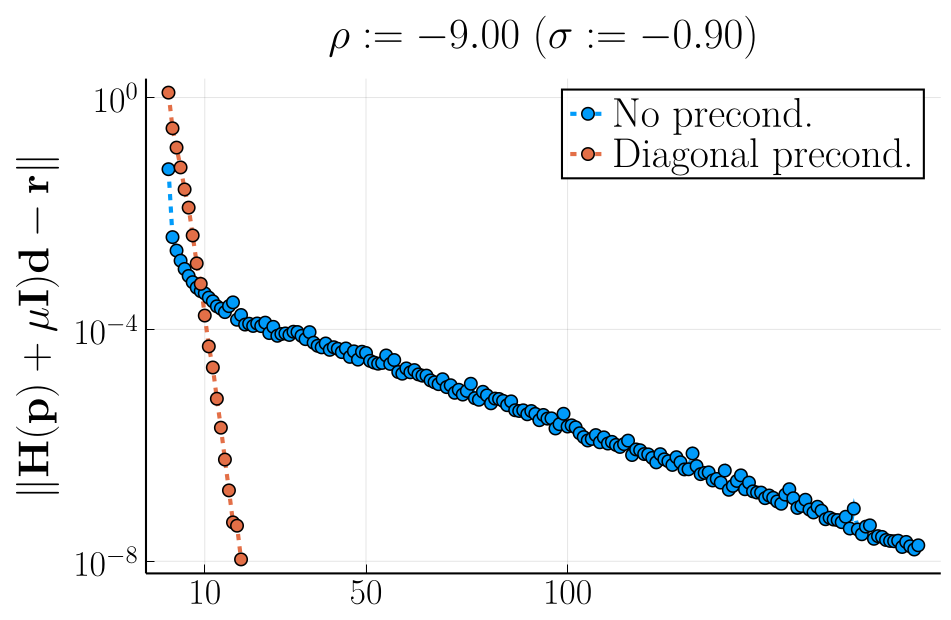

In [74]:
fig = generate_empty(; shape=:wide)
plot!(
    fig,
    ylabel=L"$\|\mathbf{H}(\mathbf{p}) + \mu \mathbf{I})\mathbf{d} - \mathbf{r}\|$",
    title=L"$\rho := %$ρfmt~(\sigma := %$σfmt)$",
    legendbackgroundcolor=RGBA(1.0, 1.0, 1.0, 0.8),
    yticks=10.0 .^ (-16:4:3),
    xtickfont=font(18),
    ytickfont=font(18),
    xscale=:identity,
    size=(600, 400)
)
plot!(
    fig,
    xticks=[10, 50, 100, 200, 500]
)

plot!(fig, stats.residuals[1:4:end], label=L"\textrm{No precond.}", linewidth=2, linestyle=:dash, markershape=:circle)
plot!(fig, stats1.residuals, label=L"\textrm{Diagonal precond.}", linewidth=2, linestyle=:dash, markershape=:circle)


In [75]:
savefig(fig, "fisher_linsys_precond.pdf")

"/Users/brent/workspace/ExchangeMarket.jl/scripts/fisher/fisher_linsys_precond.pdf"

In [46]:
eigen(P⁺ * H * P⁺)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
5000-element Vector{ComplexF64}:
 0.09999999999999852 + 0.0im
 0.09999999999999863 + 0.0im
 0.09999999999999866 + 0.0im
 0.09999999999999867 + 0.0im
 0.09999999999999871 + 0.0im
 0.09999999999999883 + 0.0im
 0.09999999999999891 + 0.0im
 0.09999999999999891 + 0.0im
 0.09999999999999892 + 0.0im
 0.09999999999999895 + 0.0im
                     ⋮
  0.2946286490581154 + 0.0im
  0.2966388269005727 + 0.0im
  0.3204691582371344 + 0.0im
  0.3322459678827525 + 0.0im
 0.40630376120536527 + 0.0im
  0.4325428388050576 + 0.0im
 0.45492298813265647 + 0.0im
  0.5901537190336605 + 0.0im
  1.0000000000000009 + 0.0im
vectors:
5000×5000 Matrix{ComplexF64}:
  0.000655325+0.0im   0.00227092+0.0im  …    0.0433396+0.0im
   0.00116114+0.0im  -0.00275493+0.0im       0.0370696+0.0im
   0.00146585+0.0im   0.00185552+0.0im       0.0186238+0.0im
   -0.0182213+0.0im  -0.00593059+0.0im     0.000298704+0.0im
 -0.000915318+0.0im  -0.00874168

In [47]:
1.0000000000000009 / 0.09999999999999895

10.000000000000114

In [24]:
sum(H; dims=2)[:] - alg.p .* sum(f1.x; dims=2)[:]

5000-element Vector{Float64}:
  1.1275702593849246e-17
 -1.5612511283791264e-17
  2.1141942363467336e-18
 -5.421010862427522e-20
 -2.0816681711721685e-17
  4.336808689942018e-18
  4.119968255444917e-18
 -8.470329472543003e-21
  4.597017211338539e-17
 -9.75781955236954e-18
  ⋮
  2.0328790734103208e-20
 -3.7947076036992655e-19
 -7.453889935837843e-20
 -3.049318610115481e-20
  6.098637220230962e-20
 -4.573977915173222e-20
  2.879912020664621e-20
  7.284483346386983e-20
 -5.082197683525802e-21